<a href="https://colab.research.google.com/github/longnguyen08/DA_Projects/blob/master/Bank_Customer_Churn_Prediction/ML_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
link='https://drive.google.com/file/d/1AqsEvh8Q6aaa5Pvr-TX8jemJdv9gL286/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path)
df = df.iloc[:,0:-2]

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
df.shape

(10127, 21)

In [ ]:
df.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7145,713305233,Existing Customer,55,M,2,Graduate,Single,$80K - $120K,Blue,46,...,5,2,4994.0,0,4994.0,0.717,4802,81,0.761,0.000
6924,719577258,Attrited Customer,43,F,2,Uneducated,Divorced,Less than $40K,Blue,30,...,3,4,6811.0,0,6811.0,0.677,1937,39,0.560,0.000
2832,804820233,Existing Customer,38,M,2,Unknown,Divorced,$80K - $120K,Blue,33,...,3,2,11777.0,1781,9996.0,0.565,2763,62,0.879,0.151
647,720923658,Existing Customer,48,M,3,Post-Graduate,Single,$60K - $80K,Blue,39,...,2,2,4734.0,954,3780.0,0.600,1570,45,0.452,0.202
6630,719716983,Existing Customer,46,F,4,Graduate,Married,Unknown,Blue,39,...,3,3,3257.0,0,3257.0,0.757,4042,85,0.848,0.000
623,718943508,Existing Customer,42,M,3,Unknown,Single,$80K - $120K,Blue,33,...,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584
7742,778245633,Existing Customer,43,F,3,Graduate,Single,Unknown,Blue,33,...,3,1,2341.0,1818,523.0,0.833,4356,70,0.628,0.777
7855,780660183,Attrited Customer,43,F,4,High School,Divorced,Less than $40K,Blue,32,...,3,2,8203.0,0,8203.0,0.691,2613,46,0.840,0.000
1564,797643708,Existing Customer,47,M,1,High School,Married,$120K +,Blue,41,...,1,4,27858.0,1314,26544.0,0.676,1772,53,0.559,0.047
8189,711252258,Existing Customer,54,F,1,High School,Single,Less than $40K,Blue,36,...,3,2,1572.0,985,587.0,0.745,4148,54,0.862,0.627


In [ ]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


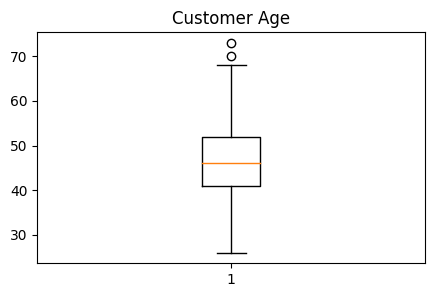

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 3))
fig = plt.boxplot(df['Customer_Age'])
plt.title('Customer Age',fontsize = 12)
plt.show()

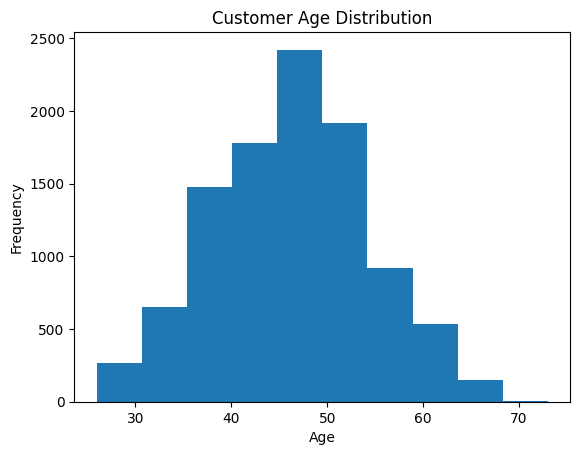

In [ ]:
fig = plt.hist(df['Customer_Age'])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title('Customer Age Distribution',fontsize = 12)
plt.show()

In [ ]:
import numpy as np
def remove_outliers_IQR(col):
  Q1 = col.quantile(0.25)
  Q3 = col.quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR
  upper_array = np.where(col>=upper)[0]
  lower_array = np.where(col<=lower)[0]
  df.drop(index=upper_array, inplace=True)
  df.drop(index=lower_array, inplace=True)

In [ ]:
remove_outliers_IQR(df['Customer_Age'])

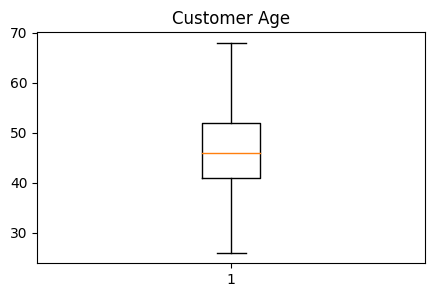

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 3))
fig = plt.boxplot(df['Customer_Age'])
plt.title('Customer Age',fontsize = 12)
plt.show()

In [ ]:
def find_unique(df):
  for col in df:
    if df[col].dtype == 'O':
      print(col,':',df[col].unique())

In [ ]:
find_unique(df)

Attrition_Flag : ['Existing Customer' 'Attrited Customer']
Gender : ['M' 'F']
Education_Level : ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status : ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category : ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category : ['Blue' 'Gold' 'Silver' 'Platinum']


In [ ]:
from statistics import mode
df["Education_Level"].replace('Unknown',mode(df['Education_Level']), inplace=True)
df["Marital_Status"].replace('Unknown',mode(df['Marital_Status']), inplace=True)
df["Income_Category"].replace('Unknown',mode(df['Income_Category']), inplace=True)

In [ ]:
find_unique(df)
df.shape

Attrition_Flag : ['Existing Customer' 'Attrited Customer']
Gender : ['M' 'F']
Education_Level : ['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status : ['Married' 'Single' 'Divorced']
Income_Category : ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']
Card_Category : ['Blue' 'Gold' 'Silver' 'Platinum']


(10125, 21)

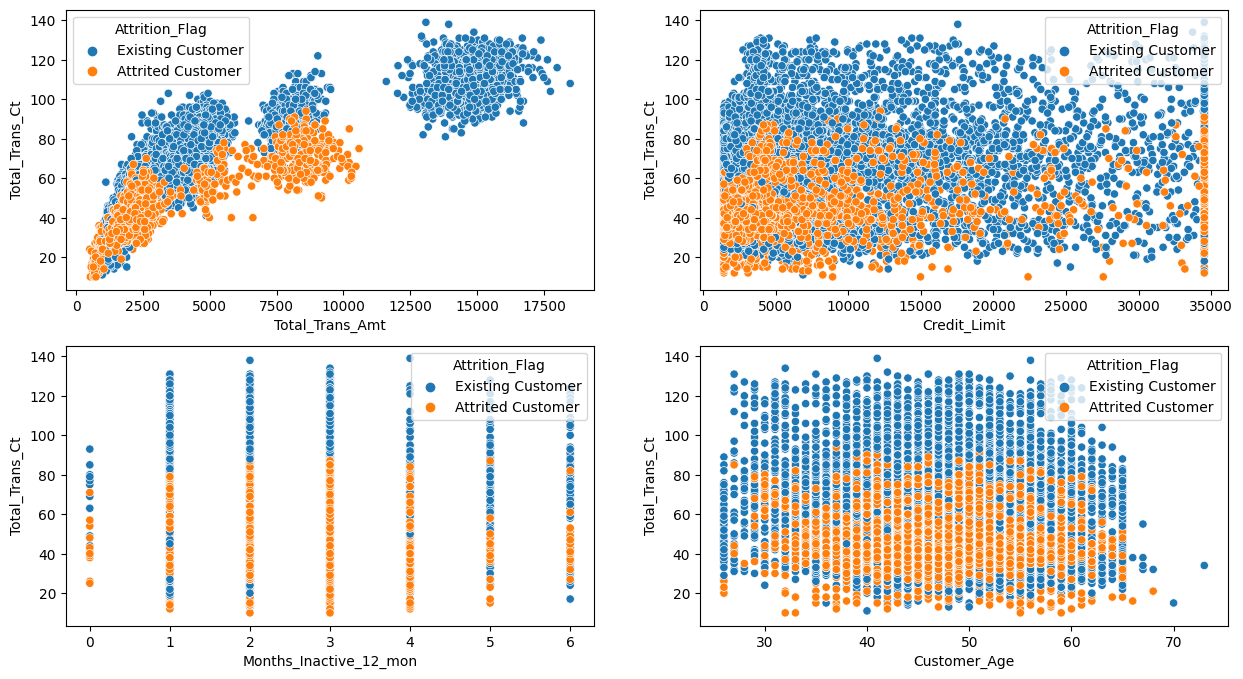

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig , ax = plt.subplots(ncols = 2,nrows = 2, figsize= (15,8))

sns.scatterplot(data = df, x = 'Total_Trans_Amt' , y = 'Total_Trans_Ct', hue = 'Attrition_Flag', ax = ax[0,0])

sns.scatterplot(data = df, x = 'Credit_Limit' , y = 'Total_Trans_Ct', hue = 'Attrition_Flag', ax = ax[0,1])

sns.scatterplot(data = df, x = 'Months_Inactive_12_mon' , y = 'Total_Trans_Ct', hue = 'Attrition_Flag', ax = ax[1,0])

freqplot = sns.scatterplot(data = df, x = 'Customer_Age' , y = 'Total_Trans_Ct', hue = 'Attrition_Flag', ax = ax[1,1])

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
def labelencoder_func(df):
  for col in df:
    if df[col].dtype == 'O':
      df[[col]] = df[[col]].apply(LabelEncoder().fit_transform)

In [ ]:
labelencoder_func(df)

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,1,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df.shape

(10125, 21)

In [ ]:
import seaborn as sns
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Lựa chọn biến X,y. Cân bằng dữ liệu(SMOTE). Lựa chọn Model

<Axes: ylabel='Attrition_Flag'>

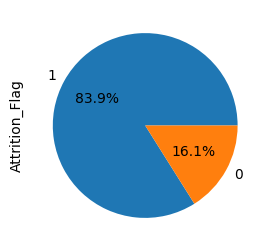

In [ ]:
df['Attrition_Flag'].value_counts().plot.pie(figsize = (5, 3),autopct='%1.1f%%')

In [ ]:
y = df['Attrition_Flag'].values
X = df.iloc[:,2:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [ ]:
X_train.shape

(7087, 19)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from datetime import datetime as dt
start = dt.now()

# Dùng Logistic Regression trước khi cân bằng dữ liệu
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

running_secs = round((dt.now() - start).microseconds/1000000,2)

print(classification_report(y_test, y_pred))
print("Run_time(s):",running_secs)

              precision    recall  f1-score   support

           0       0.40      0.84      0.55       477
           1       0.96      0.77      0.85      2561

    accuracy                           0.78      3038
   macro avg       0.68      0.80      0.70      3038
weighted avg       0.88      0.78      0.81      3038

Run_time(s): 0.37


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 3.722222222222216, 'Dự báo')

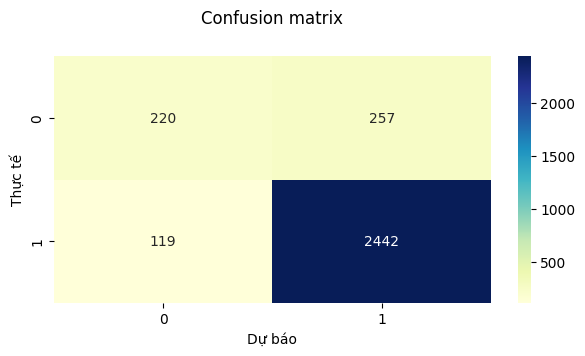

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize = (6, 3))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [ ]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Cân bằng dữ liệu
from imblearn.over_sampling import SMOTE
SM_Model=SMOTE()
X_SM, y_SM=SM_Model.fit_resample(X_train,y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_SM.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_SM.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_SM == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_SM == 0)))

Before OverSampling, counts of label '1': 5937
Before OverSampling, counts of label '0': 1150 

After OverSampling, the shape of train_X: (11874, 19)
After OverSampling, the shape of train_y: (11874,) 

After OverSampling, counts of label '1': 5937
After OverSampling, counts of label '0': 5937


In [ ]:
start = dt.now()

#Chạy lại mô hình
X_train=X_SM
y_train=y_SM
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)


running_secs = round((dt.now() - start).microseconds/1000000,2)

print(classification_report(y_test, y_pred))
print("Run_time(s):",running_secs)

              precision    recall  f1-score   support

           0       0.40      0.84      0.55       477
           1       0.96      0.77      0.85      2561

    accuracy                           0.78      3038
   macro avg       0.68      0.80      0.70      3038
weighted avg       0.88      0.78      0.81      3038

Run_time(s): 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 3.722222222222216, 'Dự báo')

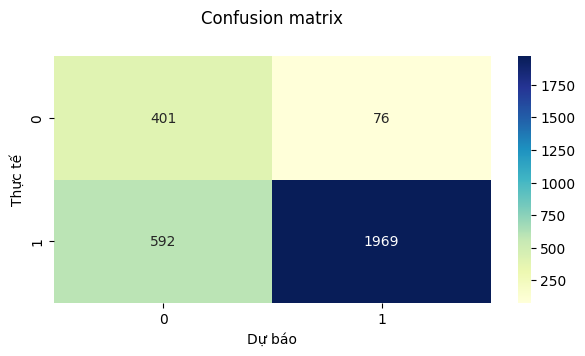

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize = (6, 3))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [ ]:
start = dt.now()

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

running_secs = round((dt.now() - start).seconds,2)

print(classification_report(y_test, y_pred))
print("Run_time(s): {:.2f}".format(running_secs))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83       477
           1       0.99      0.94      0.96      2561

    accuracy                           0.94      3038
   macro avg       0.87      0.94      0.90      3038
weighted avg       0.95      0.94      0.94      3038

Run_time(s): 1.00


In [ ]:
start = dt.now()

from sklearn.ensemble import GradientBoostingClassifier
Gra = GradientBoostingClassifier()
Gra.fit(X_train, y_train)
y_pred=Gra.predict(X_test)

running_secs = round((dt.now() - start).seconds,2)

print(classification_report(y_test, y_pred))
print("Run_time(s): {:.2f}".format(running_secs))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       477
           1       0.99      0.96      0.97      2561

    accuracy                           0.95      3038
   macro avg       0.89      0.94      0.91      3038
weighted avg       0.96      0.95      0.95      3038

Run_time(s): 3.00


In [ ]:
start = dt.now()

import xgboost as xgb
Xg = xgb.XGBClassifier()
Xg.fit(X_train, y_train)
y_pred=Xg.predict(X_test)

running_secs = round((dt.now() - start).seconds,2)

print(classification_report(y_test, y_pred))
print("Run_time(s): {:.2f}".format(running_secs))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       477
           1       0.99      0.97      0.98      2561

    accuracy                           0.97      3038
   macro avg       0.93      0.95      0.94      3038
weighted avg       0.97      0.97      0.97      3038

Run_time(s): 4.00


In [ ]:
start = dt.now()

import lightgbm as lgb
Lig = lgb.LGBMClassifier()
Lig.fit(X_train, y_train)
y_pred=Lig.predict(X_test)

running_secs = round((dt.now() - start).seconds,2)

print(classification_report(y_test, y_pred))
print("Run_time(s): {:.2f}".format(running_secs))

[LightGBM] [Info] Number of positive: 5937, number of negative: 5937
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 11874, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       477
           1       0.99      0.97      0.98      2561

    accuracy                           0.97      3038
   macro avg       0.93      0.95      0.94      3038
weighted avg       0.97      0.97      0.97      3038

Run_time(s): 2.00
